In [2]:
# Importando as bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()


### Variáveis
wage salário 3.10 a hora  
educ estudou 11 anos  
exper 2 anos de experiência  
nonwhite não branca (1 nowhite / 0 white)  
(conversão em estatística variáveis binárias o nome do título é o 1)  



In [5]:
# Importando a base de dados
dados = pd.read_csv('Salarios_caracteristicas.csv')

dados.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,hcasados,mcasadas,msolteiras,Dnumdep_0,Dnumdep_1,Dnumdep_2,Dnumdep_3,Dnumdep_4,Dnumdep_5,Dnumdep_6
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,1,0,0,1,0,0,0,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,1,0,0,0,0,1,0,0,0
2,3.00,11,2,0,0,0,0,2,0,0,...,0,0,0,0,0,1,0,0,0,0
3,6.00,8,44,28,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
4,5.30,12,7,2,0,0,1,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [6]:
dados.describe()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,hcasados,mcasadas,msolteiras,Dnumdep_0,Dnumdep_1,Dnumdep_2,Dnumdep_3,Dnumdep_4,Dnumdep_5,Dnumdep_6
count,526.000000,526.000000,526.00000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,...,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,5.896103,12.562738,17.01711,5.104563,0.102662,0.479087,0.608365,1.043726,0.722433,0.250951,...,0.357414,0.250951,0.228137,0.479087,0.199620,0.188213,0.085551,0.030418,0.013308,0.003802
std,3.693086,2.769022,13.57216,7.224462,0.303805,0.500038,0.488580,1.261891,0.448225,0.433973,...,0.479695,0.433973,0.420031,0.500038,0.400095,0.391254,0.279967,0.171899,0.114699,0.061604
min,0.530000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.330000,12.000000,5.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.650000,12.000000,13.50000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.880000,14.000000,26.00000,7.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.750000,...,1.000000,0.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,24.980000,18.000000,51.00000,44.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wage        526 non-null    float64
 1   educ        526 non-null    int64  
 2   exper       526 non-null    int64  
 3   tenure      526 non-null    int64  
 4   nonwhite    526 non-null    int64  
 5   female      526 non-null    int64  
 6   married     526 non-null    int64  
 7   numdep      526 non-null    int64  
 8   smsa        526 non-null    int64  
 9   northcen    526 non-null    int64  
 10  south       526 non-null    int64  
 11  west        526 non-null    int64  
 12  construc    526 non-null    int64  
 13  ndurman     526 non-null    int64  
 14  trcommpu    526 non-null    int64  
 15  trade       526 non-null    int64  
 16  services    526 non-null    int64  
 17  profserv    526 non-null    int64  
 18  profocc     526 non-null    int64  
 19  clerocc     526 non-null    i

In [8]:
dados.isnull().sum()

wage          0
educ          0
exper         0
tenure        0
nonwhite      0
female        0
married       0
numdep        0
smsa          0
northcen      0
south         0
west          0
construc      0
ndurman       0
trcommpu      0
trade         0
services      0
profserv      0
profocc       0
clerocc       0
servocc       0
lwage         0
expersq       0
tenursq       0
male          0
solteira      0
hcasados      0
mcasadas      0
msolteiras    0
Dnumdep_0     0
Dnumdep_1     0
Dnumdep_2     0
Dnumdep_3     0
Dnumdep_4     0
Dnumdep_5     0
Dnumdep_6     0
dtype: int64

In [ ]:
# Mostrando todas as linhas e colunas

pd.options.display.max_columns = None
pd.options.display.max_rows = None

display(dados)

In [10]:
dados.describe()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,south,west,construc,ndurman,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq,male,solteira,hcasados,mcasadas,msolteiras,Dnumdep_0,Dnumdep_1,Dnumdep_2,Dnumdep_3,Dnumdep_4,Dnumdep_5,Dnumdep_6
count,526.000000,526.000000,526.00000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,5.896103,12.562738,17.01711,5.104563,0.102662,0.479087,0.608365,1.043726,0.722433,0.250951,0.355513,0.169202,0.045627,0.114068,0.043726,0.287072,0.100760,0.258555,0.366920,0.167300,0.140684,1.623268,473.435361,78.150190,0.520913,0.391635,0.357414,0.250951,0.228137,0.479087,0.199620,0.188213,0.085551,0.030418,0.013308,0.003802
std,3.693086,2.769022,13.57216,7.224462,0.303805,0.500038,0.488580,1.261891,0.448225,0.433973,0.479124,0.375287,0.208874,0.318197,0.204680,0.452826,0.301298,0.438257,0.482423,0.373599,0.348027,0.531538,616.044772,199.434664,0.500038,0.488580,0.479695,0.433973,0.420031,0.500038,0.400095,0.391254,0.279967,0.171899,0.114699,0.061604
min,0.530000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.634878,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.330000,12.000000,5.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.202972,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.650000,12.000000,13.50000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.536867,182.500000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.880000,14.000000,26.00000,7.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.750000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.928619,676.000000,49.000000,1.000000,1.000000,1.000000,0.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,24.980000,18.000000,51.00000,44.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.218076,2601.000000,1936.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


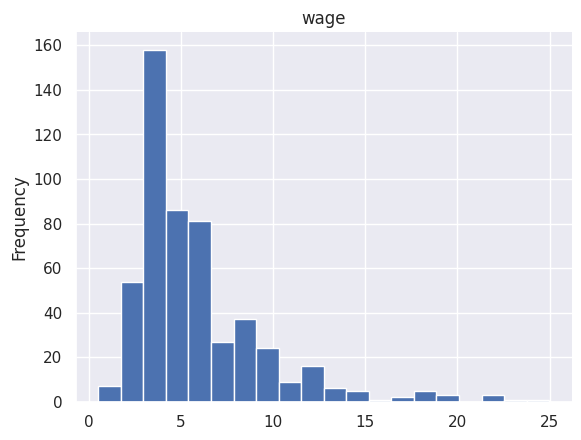

In [ ]:
# Gerando o histograma da variável dependente
# bins largura das colunas

from matplotlib import pyplot as plt
dados['wage'].plot(kind='hist', bins=20, title='wage')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Regressão Mulheres e salário

In [14]:
y = dados['wage']
x1 = dados['female']

In [15]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     68.54
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           1.04e-15
Time:                        15:19:59   Log-Likelihood:                -1400.7
No. Observations:                 526   AIC:                             2805.
Df Residuals:                     524   BIC:                             2814.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0995      0.210     33.806      0.0

### Análise de salários  
R-squared: O salário da pessoa por ser mulher é explicado em 11%  
  
#### Analisando salário, gênero, educação e experiência.


In [27]:
y = dados['wage']
x1 = dados[['female', 'educ', 'exper']]

In [28]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     77.92
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           1.15e-41
Time:                        15:50:32   Log-Likelihood:                -1335.7
No. Observations:                 526   AIC:                             2679.
Df Residuals:                     522   BIC:                             2697.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7345      0.754     -2.302      0.0

### Analisando:  
R2: 30% da questão do salário é explicado por essas 3 variáveis.

In [33]:
# Declarando a variável dependente e as independentes

y = dados['wage']

x1 = dados[['educ', 'exper', 'female', 'nonwhite']]


In [34]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     58.34
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           1.09e-40
Time:                        16:02:16   Log-Likelihood:                -1335.7
No. Observations:                 526   AIC:                             2681.
Df Residuals:                     521   BIC:                             2703.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7145      0.762     -2.251      0.0

### Análise Dados:   
no teste t nonwhite ficou abaixo de 2 logo nessa base não existe evidiência de preconceiro em relação a pele.

### converter a variável em % usando Logarítmo

In [ ]:
# insere uma coluna q é o log
dados['log_wage'] = np.log(dados['wage'])
dados.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,south,west,construc,ndurman,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq,male,solteira,hcasados,mcasadas,msolteiras,Dnumdep_0,Dnumdep_1,Dnumdep_2,Dnumdep_3,Dnumdep_4,Dnumdep_5,Dnumdep_6,log_wage
0,3.10,11,2,0,0,1,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,1.131402,4,0,0,1,0,0,1,0,0,1,0,0,0,0,1.131402
1,3.24,12,22,2,0,1,1,3,1,0,0,1,0,0,0,0,1,0,0,0,1,1.175573,484,4,0,0,0,1,0,0,0,0,1,0,0,0,1.175573
2,3.00,11,2,0,0,0,0,2,0,0,0,1,0,0,0,1,0,0,0,0,0,1.098612,4,0,1,1,0,0,0,0,0,1,0,0,0,0,1.098612
3,6.00,8,44,28,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1.791759,1936,784,1,0,1,0,0,1,0,0,0,0,0,0,1.791759
4,5.30,12,7,2,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1.667707,49,4,1,0,1,0,0,0,1,0,0,0,0,0,1.667707


In [45]:
# Declarando a variável dependente e as independentes

y = dados['log_wage']

x1 = dados[['educ', 'exper', 'female', 'nonwhite']]

In [46]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     70.93
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           6.04e-48
Time:                        17:02:52   Log-Likelihood:                -299.10
No. Observations:                 526   AIC:                             608.2
Df Residuals:                     521   BIC:                             629.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4832      0.106      4.552      0.0

In [47]:
# Regressão múltipla com o Sklearn

from sklearn.linear_model import LinearRegression

In [48]:
# Declarando as variáveis independentes e dependente

y = dados ['wage']
x = dados[['educ', 'exper', 'female', 'nonwhite']]

In [41]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [49]:
reg.coef_

array([ 0.60174884,  0.06421637, -2.15649365, -0.08388505])

In [50]:
reg.intercept_

np.float64(-1.7145264430280598)

In [51]:
# Calculando o R²

reg.score(x,y)

0.3093508751818115